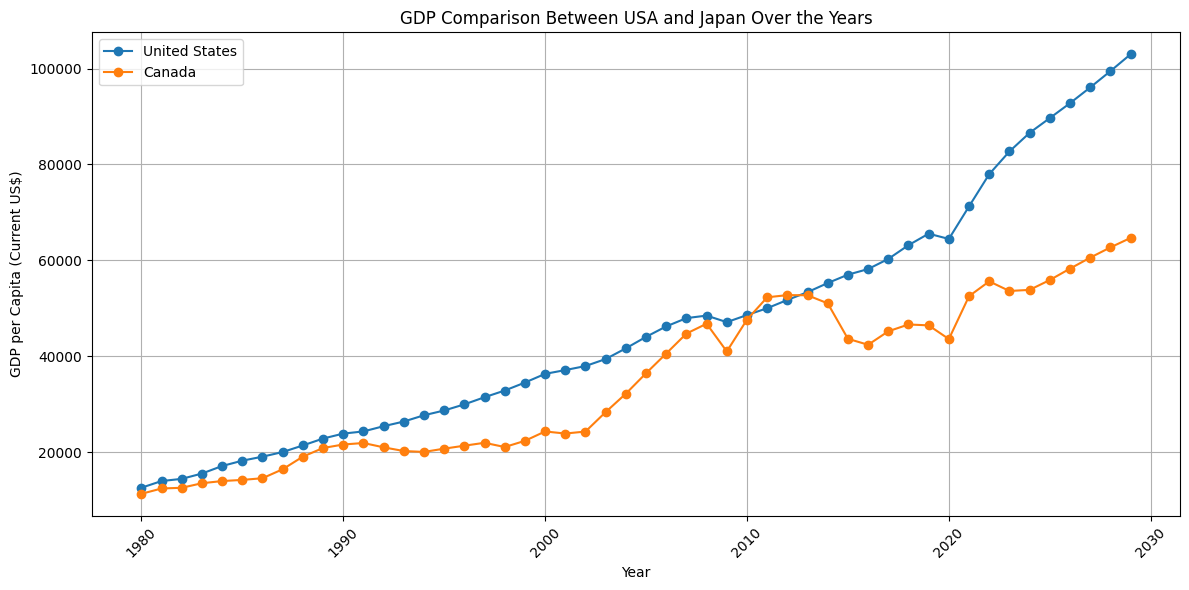

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'IMFdataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Rename the country column for easier access
data = data.rename(columns={'GDP per capita, current prices\n (U.S. dollars per capita)': 'country'})

# Filter data for USA and Japan
countries = ['United States', 'Canada']
filtered_data = data[data['country'].isin(countries)].set_index('country')

# Handle missing or non-numeric data
filtered_data = filtered_data.replace('no data', None).dropna(axis=1).apply(pd.to_numeric, errors='coerce')

# Transpose the data to have years as rows and countries as columns
gdp_data = filtered_data.transpose()
gdp_data.index = gdp_data.index.astype(int)  # Convert years to integers for sorting

# Sort by year to ensure proper order
gdp_data = gdp_data.sort_index()

# Plot the GDP data
plt.figure(figsize=(12, 6))

for country in countries:
    plt.plot(gdp_data.index, gdp_data[country], label=country, marker='o')

# Customize the plot
plt.title('GDP Comparison Between USA and Japan Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (Current US$)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


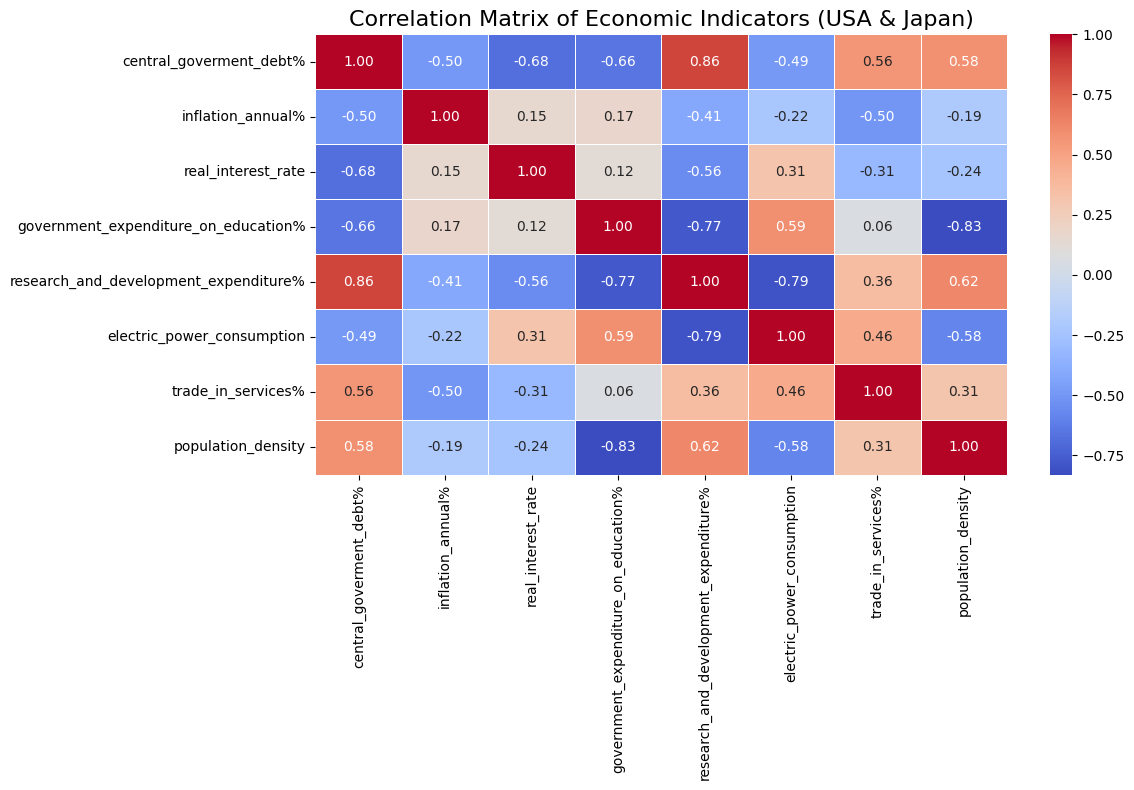

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'world_bank_development_indicators_with_gdp_per_capita.csv'
data = pd.read_csv(file_path)

# Filter data for United States and Japan
countries = ["United States", "Japan"]
data_filtered = data[data['country'].isin(countries)]

# Select relevant columns for correlation analysis
correlation_columns = ['central_goverment_debt%', 'inflation_annual%', 'real_interest_rate',
                       'government_expenditure_on_education%', 'research_and_development_expenditure%',
                       'electric_power_consumption', 'trade_in_services%', 'population_density']

# Calculate the correlation matrix
correlation_matrix = data_filtered[correlation_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Economic Indicators (USA & Japan)", fontsize=16)
plt.tight_layout()
plt.show()


/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_54969/768482356.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')


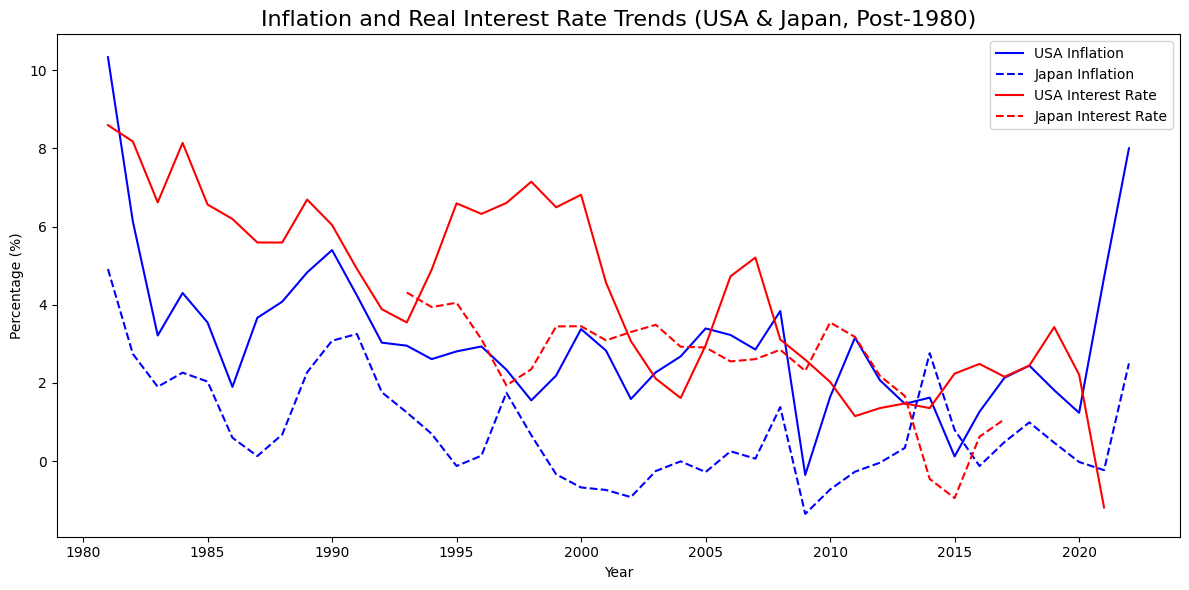

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = 'world_bank_development_indicators_with_gdp_per_capita.csv'
data = pd.read_csv(file_path)

# Filter data for United States and Japan
countries = ["United States", "Japan"]
data_filtered = data[data['country'].isin(countries)]

# Convert 'date' column to datetime
data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')

# Filter data for years after 1980
data_filtered = data_filtered[data_filtered['date'].dt.year > 1980]

# Plot the trends in inflation and real interest rates
plt.figure(figsize=(12, 6))

sns.lineplot(data=data_filtered[data_filtered['country'] == 'United States'], 
             x='date', y='inflation_annual%', label='USA Inflation', color='blue')

sns.lineplot(data=data_filtered[data_filtered['country'] == 'Japan'], 
             x='date', y='inflation_annual%', label='Japan Inflation', color='blue', linestyle='--')

sns.lineplot(data=data_filtered[data_filtered['country'] == 'United States'], 
             x='date', y='real_interest_rate', label='USA Interest Rate', color='red')

sns.lineplot(data=data_filtered[data_filtered['country'] == 'Japan'], 
             x='date', y='real_interest_rate', label='Japan Interest Rate', color='red', linestyle='--')

plt.title("Inflation and Real Interest Rate Trends (USA & Japan, Post-1980)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.legend()
plt.tight_layout()
plt.show()
